# BOOMBIKES Bike Sharing Case Study

## Problem Statement

Team boombikes wanted to understand to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

#### Data Import, Handling and Cleansing

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
bike_data = pd.read_csv(r"C:\Users\LENOVO\Upgrad\Machine LEarning\Bike Sharing Assignment\day.csv")

In [3]:
# Check the head of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect Data on various expects

In [4]:
#Check the shape of the dataframe
bike_data.shape

(730, 16)

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Check for Null Values in Data set
bike_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Mapping string values to categorical columns

bike_data["season"] = bike_data["season"].replace({1:'Spring',2:"Summer",3:"Fall",4:"Winter"})
bike_data["mnth"] = bike_data["mnth"].replace({1:'January',2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})
bike_data["weekday"] = bike_data["weekday"].replace({0:"Sunday",1:'Monday',2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
bike_data["weathersit"] = bike_data["weathersit"].replace({1:"Clear + Partly Cloudy",2:"Mist + Cloudy",3:"Light Precipitation",4:"Heavy Precipitation"})
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Monday,1,Clear + Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,Clear + Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#DRoping unwanted columsn
bike_data.drop(['instant','dteday'],axis=1,inplace=True)


In [10]:
#Converting Columns to Categorical
bike_data.season=bike_data.season.astype('category')
bike_data.yr=bike_data.yr.astype('category')
bike_data.mnth=bike_data.mnth.astype('category')
bike_data.holiday=bike_data.holiday.astype('category')
bike_data.weekday=bike_data.weekday.astype('category')
bike_data.workingday=bike_data.workingday.astype('category')
bike_data.weathersit=bike_data.weathersit.astype('category')

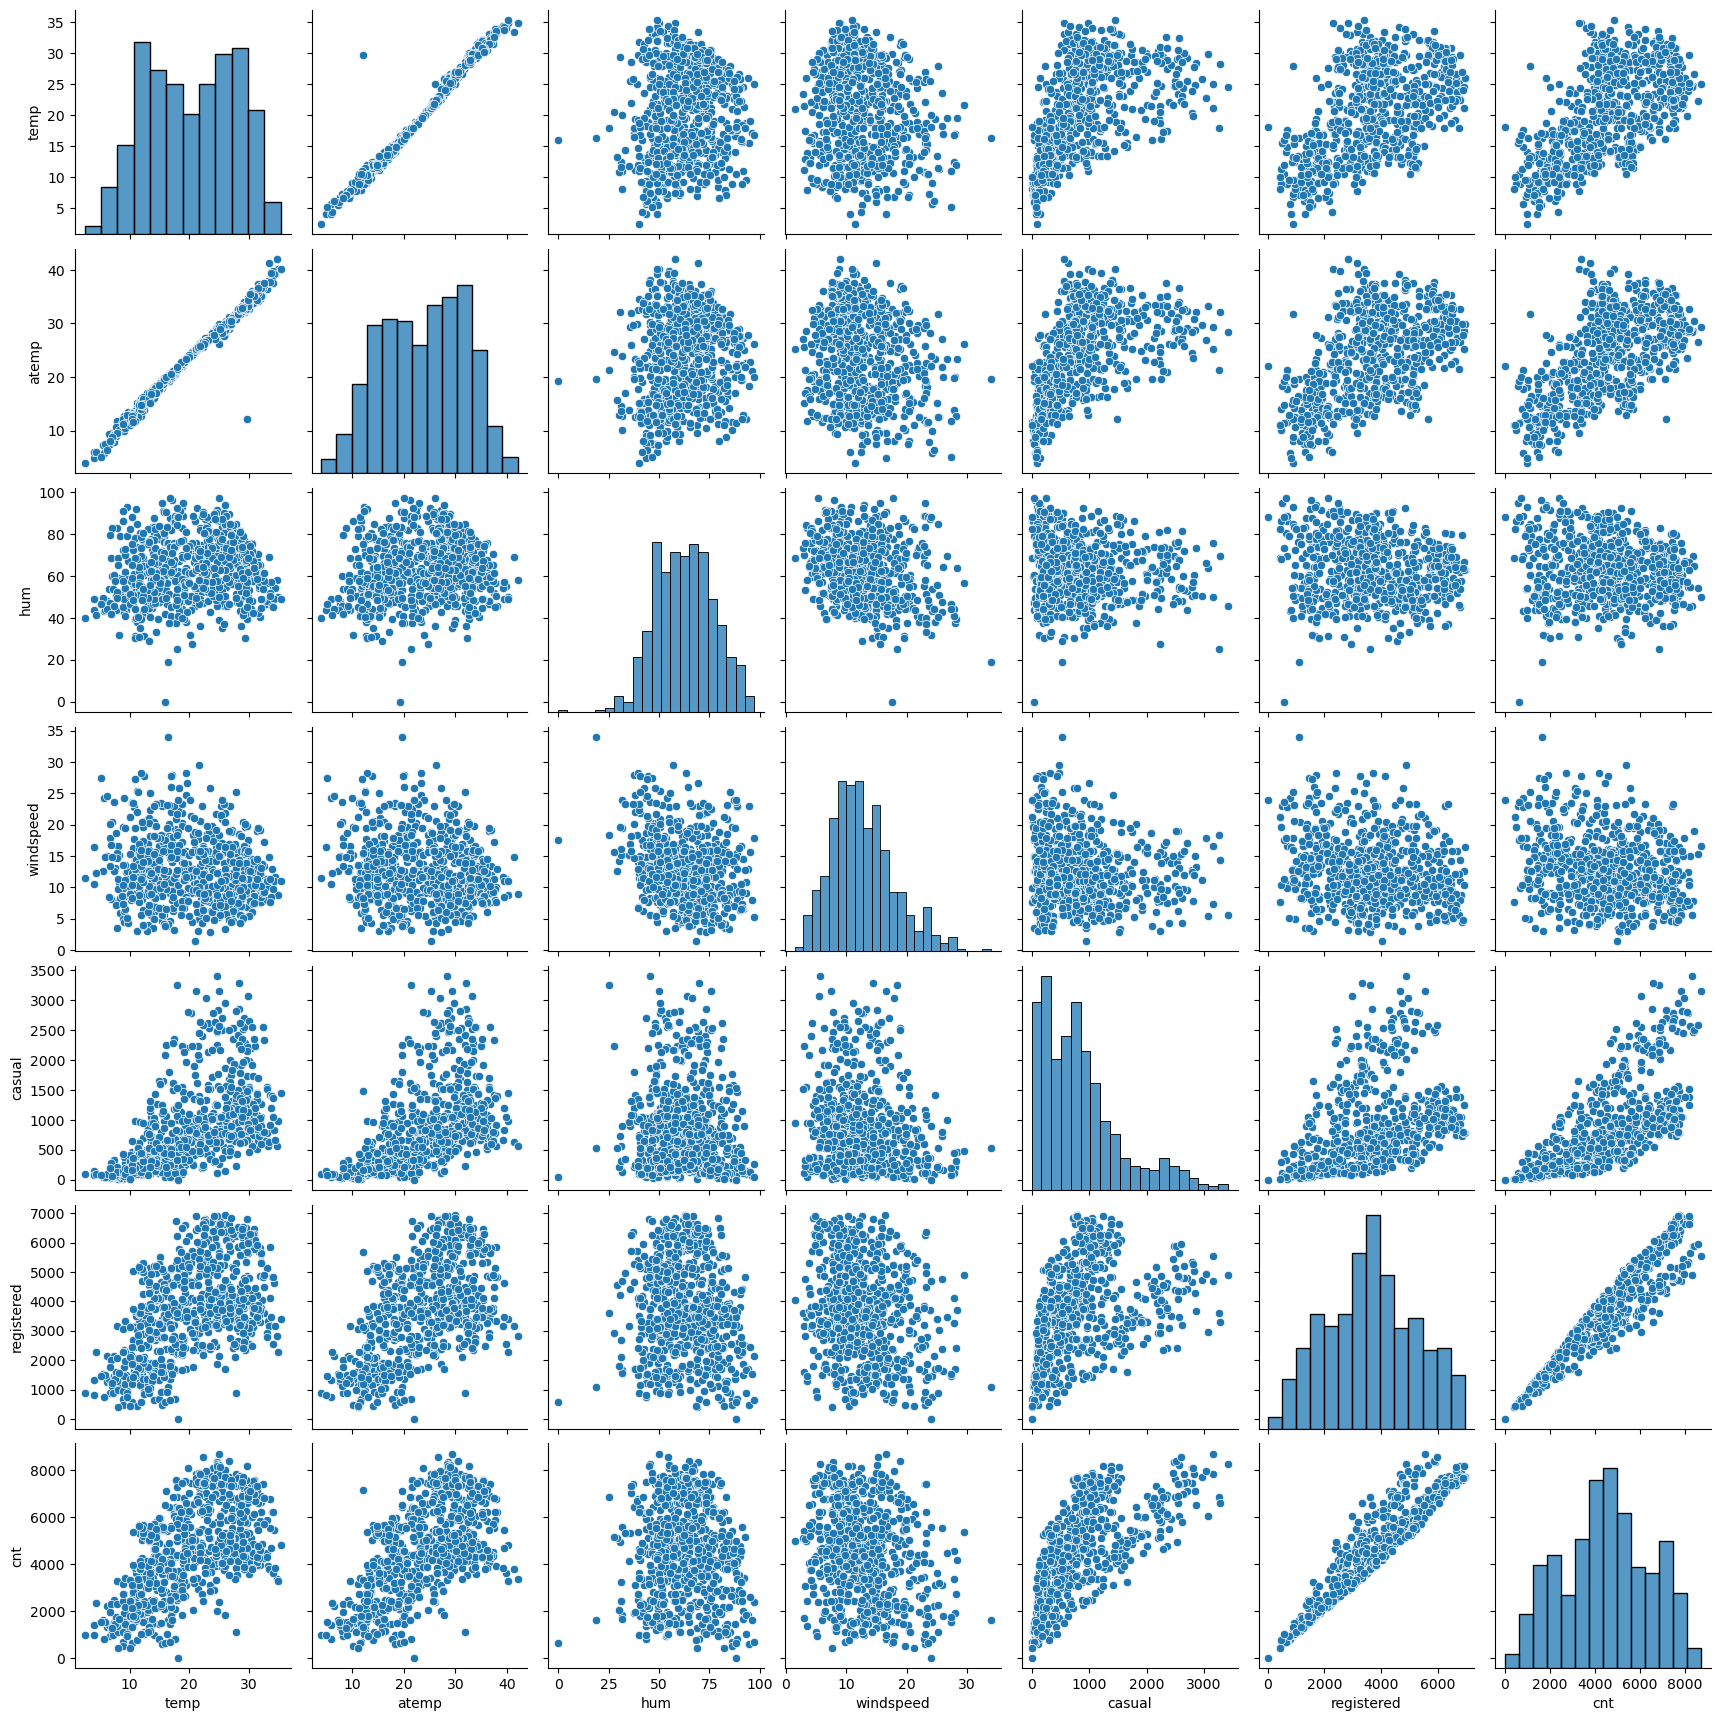

In [11]:
#Data visusalisation using scatter plot
sns.pairplot(bike_data)
plt.show()

### Inference:
1. From above plot, it can be seen that temp and atemp has high positive correlation.
2. cnt has linear corelation with tmp and atmp

In [12]:
#Drop temp column
bike_data.drop(['temp'],axis=1,inplace=True)

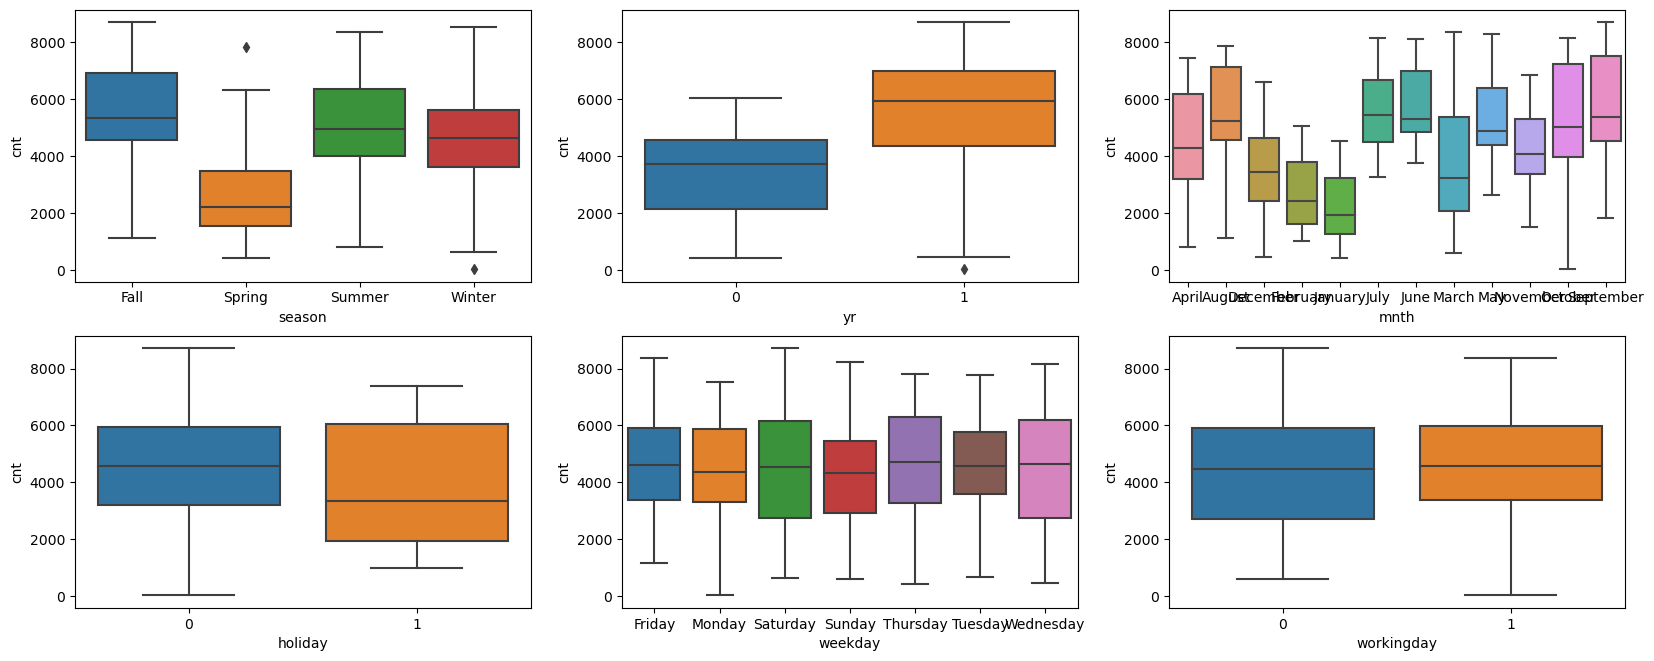

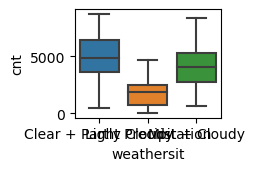

In [13]:
#Box plot for categorical data

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()


### Inference
1. From weekday and workingday categories are showing similar demands.
2. From yr-1 (2019) has hier demand than that in previous year (2018)
3. Demand gets increases from JAnuary and reaches maximumtil July which started falling. Demand is much  from May to October.
4. There is high demand during fall season.
5. During holiday demand decreases.
6. Most bikes were rented in misty and artly cloudy weather and least when light rains or snow


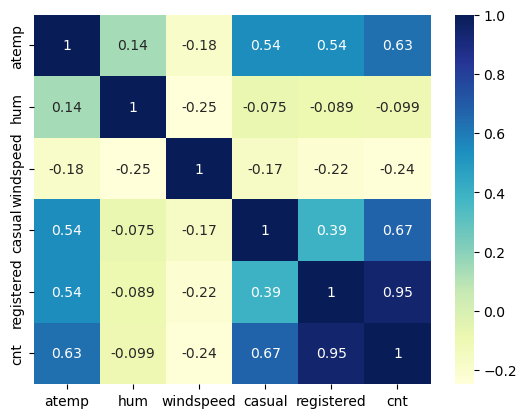

In [14]:
# Check correlations between numerical variables
sns.heatmap(bike_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Inference
Since atemp is highly correlated with temp and "casual","registered" are highly correlated with count , so deleting the column "atemp","casual","registered"

In [15]:
#Drop casual and registered column
bike_data.drop(['casual','registered'],axis=1,inplace=True)

In [16]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear + Partly Cloudy,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear + Partly Cloudy,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,11.46350,43.6957,12.522300,1600


#### Creating Dummy Variables

In [17]:
var_list=['season','mnth','weekday','weathersit']
bike_data1=pd.get_dummies(bike_data[var_list],drop_first=True)
bike_data1.head()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
var_list=['season','mnth','weekday','weathersit']
bike_data=pd.concat([bike_data,bike_data1],axis=1)
bike_data.drop(var_list,axis=1,inplace=True)
bike_data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting Data into Training and Testing data sets

In [19]:
df_Train,df_Test=train_test_split(bike_data,train_size=0.7,test_size=0.3,random_state=100)

### Rescaling of Features

In [20]:
scaler=MinMaxScaler()
num_vars=['atemp','hum','windspeed','cnt']
df_Train[num_vars]=scaler.fit_transform(df_Train[num_vars])
df_Train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
df_Train.describe()

,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


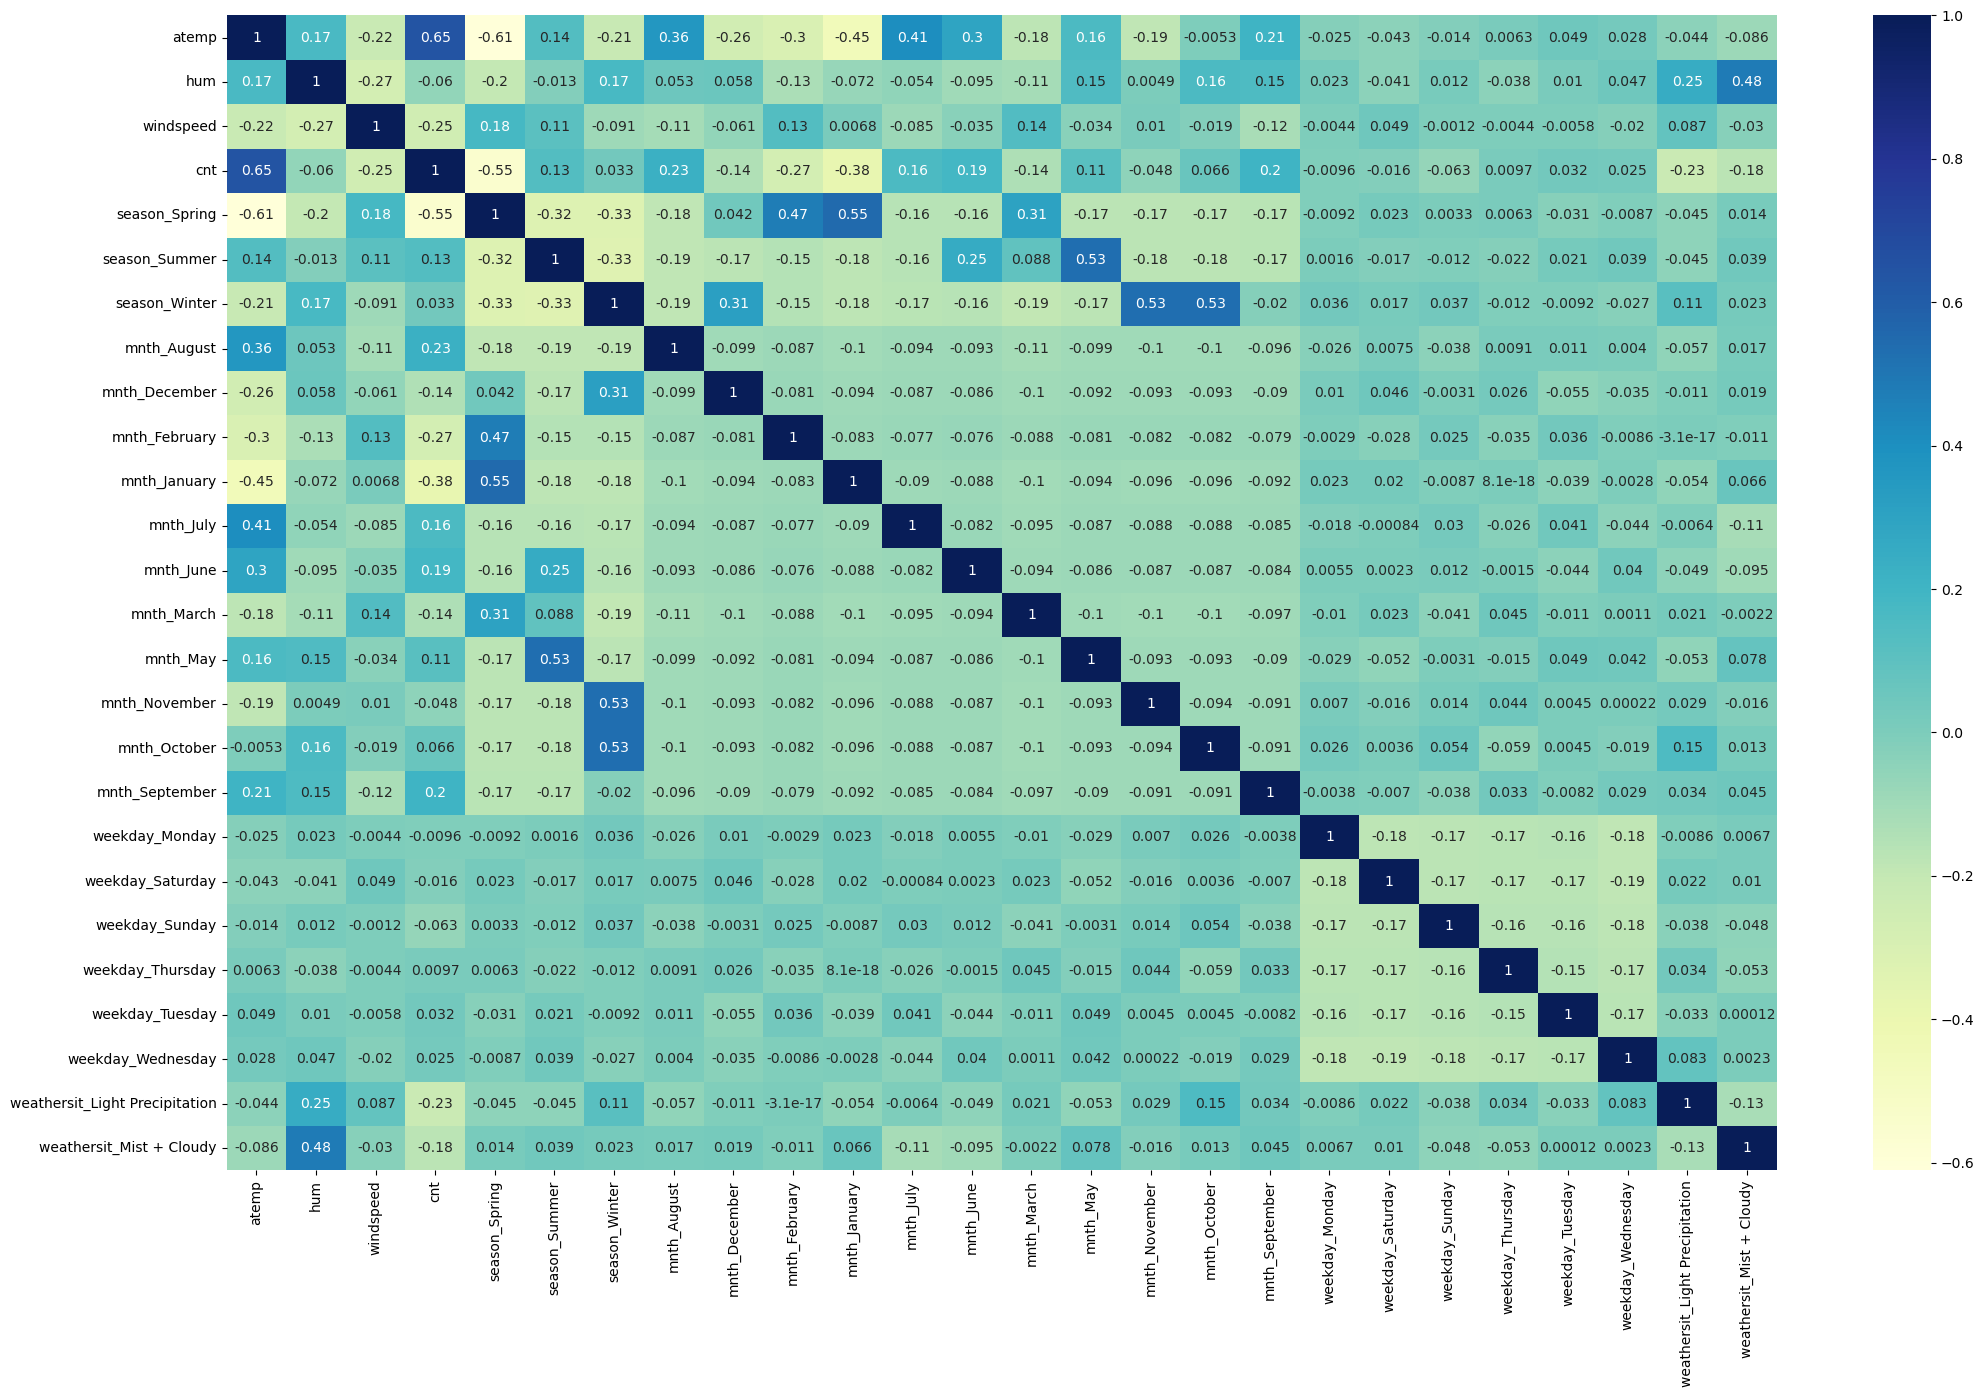

In [22]:
#  check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 15))
sns.heatmap(df_Train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [23]:
#Deviding X and Y train
y_train = df_Train.pop('cnt')
X_train = df_Train

### Building Linear Model

In [24]:
#Running RFE with o/p variable equal to 15
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe_model= RFE(lm,n_features_to_select=15,step=1)
rfe_model=rfe_model.fit(X_train,y_train)
list(zip(X_train.columns,rfe_model.support_,rfe_model.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 5),
 ('season_Winter', True, 1),
 ('mnth_August', False, 6),
 ('mnth_December', True, 1),
 ('mnth_February', False, 3),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 7),
 ('mnth_March', False, 14),
 ('mnth_May', False, 4),
 ('mnth_November', True, 1),
 ('mnth_October', False, 12),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Precipitation', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [25]:
# List of supported Column names
col=X_train.columns[rfe_model.support_]
print(col)

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weekday_Saturday',
       'weathersit_Light Precipitation', 'weathersit_Mist + Cloudy'],
      dtype='object')


### Model building using statsmodel and evaluation

In [26]:
X_train_rfe=X_train[col]
X_train_sm=sm.add_constant(X_train_rfe)
lr =sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const                             0.366172
yr                                0.232598
holiday                          -0.084117
atemp                             0.446979
hum                              -0.147689
windspeed                        -0.169162
season_Spring                    -0.106986
season_Winter                     0.066155
mnth_December                    -0.048480
mnth_January                     -0.051525
mnth_July                        -0.067871
mnth_November                    -0.050182
mnth_September                    0.058559
weekday_Saturday                  0.018187
weathersit_Light Precipitation   -0.250410
weathersit_Mist + Cloudy         -0.058230
dtype: float64

In [27]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 04 Jan 2023   Prob (F-statistic):          9.67e-187
Time:                        17:48:47   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3662      0.032     11.425      0.000       0.303       0.429
yr                                 0.2326      0.008     28.490      0.000       0.217       0.249
holiday                           -0.0841      0.026     -3.243      0.001      -0.135      -0.033
atemp                              0.4470      0.035     12.826      0.000       0.379       0.515
hum                               -0.1477      0.038     -3.874      0.000      -0.223      -0.073
windspeed                         -0.1692      0.026     -6.498      0.000      -0.220      -0.118
season_Spring                     -0.1070      0.015     -6.974      0.000      -0.137      -0.077
season_Winter                      0.0662      0.014      4.703      0.000       0.039       0.094
mnth_December                     -0.0485      0.017     -2.791      0.005      -0.083      -0.014
mnth_January                      -0.0515      0.018     -2.836      0.005      -0.087      -0.016
mnth_July                         -0.0679      0.017     -3.935      0.000      -0.102      -0.034
mnth_November                     -0.0502      0.019     -2.689      0.007      -0.087      -0.014
mnth_September                     0.0586      0.016      3.751      0.000       0.028       0.089
weekday_Saturday                   0.0182      0.011      1.627      0.104      -0.004       0.040
weathersit_Light Precipitation    -0.2504      0.027     -9.381      0.000      -0.303      -0.198
weathersit_Mist + Cloudy          -0.0582      0.011     -5.501      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       73.887   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.568
Skew:                          -0.724   Prob(JB):                     9.28e-43
Kurtosis:                       5.648   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.88
4,windspeed,4.03
6,season_Winter,2.93
5,season_Spring,2.89
14,weathersit_Mist + Cloudy,2.26
0,yr,2.06
10,mnth_November,1.82
8,mnth_January,1.75
7,mnth_December,1.54


In [29]:
# Drop Variable saturday month
X_train_rfe1 = X_train_rfe.drop("weekday_Saturday",axis=1)

#### Build Model-2

In [30]:

X_train_sm=sm.add_constant(X_train_rfe1)
lr1 =sm.OLS(y_train,X_train_sm)
lr1_model=lr1.fit()
lr1_model.params

const                             0.370445
yr                                0.232124
holiday                          -0.087054
atemp                             0.447030
hum                              -0.151049
windspeed                        -0.167709
season_Spring                    -0.106957
season_Winter                     0.066657
mnth_December                    -0.047452
mnth_January                     -0.050923
mnth_July                        -0.067566
mnth_November                    -0.050551
mnth_September                    0.058931
weathersit_Light Precipitation   -0.248987
weathersit_Mist + Cloudy         -0.057596
dtype: float64

In [31]:
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 04 Jan 2023   Prob (F-statistic):          2.58e-187
Time:                        17:48:47   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3704      0.032     11.578      0.000       0.308       0.433
yr                                 0.2321      0.008     28.403      0.000       0.216       0.248
holiday                           -0.0871      0.026     -3.359      0.001      -0.138      -0.036
atemp                              0.4470      0.035     12.806      0.000       0.378       0.516
hum                               -0.1510      0.038     -3.961      0.000      -0.226      -0.076
windspeed                         -0.1677      0.026     -6.435      0.000      -0.219      -0.117
season_Spring                     -0.1070      0.015     -6.961      0.000      -0.137      -0.077
season_Winter                      0.0667      0.014      4.732      0.000       0.039       0.094
mnth_December                     -0.0475      0.017     -2.729      0.007      -0.082      -0.013
mnth_January                      -0.0509      0.018     -2.799      0.005      -0.087      -0.015
mnth_July                         -0.0676      0.017     -3.911      0.000      -0.102      -0.034
mnth_November                     -0.0506      0.019     -2.704      0.007      -0.087      -0.014
mnth_September                     0.0589      0.016      3.769      0.000       0.028       0.090
weathersit_Light Precipitation    -0.2490      0.027     -9.317      0.000      -0.301      -0.196
weathersit_Mist + Cloudy          -0.0576      0.011     -5.435      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       68.422   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.422
Skew:                          -0.657   Prob(JB):                     2.00e-41
Kurtosis:                       5.663   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.83
4,windspeed,4.00
6,season_Winter,2.93
5,season_Spring,2.89
13,weathersit_Mist + Cloudy,2.26
0,yr,2.06
10,mnth_November,1.82
8,mnth_January,1.75
7,mnth_December,1.54


In [33]:
# Drop Variable November month
X_train_rfe1 = X_train_rfe1.drop("mnth_November",axis=1)

#### Model-3

In [34]:

X_train_sm=sm.add_constant(X_train_rfe1)
lr1 =sm.OLS(y_train,X_train_sm)
lr1_model=lr1.fit()
lr1_model.params

const                             0.357129
yr                                0.232128
holiday                          -0.095321
atemp                             0.465693
hum                              -0.150371
windspeed                        -0.167155
season_Spring                    -0.103361
season_Winter                     0.048995
mnth_December                    -0.029913
mnth_January                     -0.045653
mnth_July                        -0.070251
mnth_September                    0.062977
weathersit_Light Precipitation   -0.244374
weathersit_Mist + Cloudy         -0.056735
dtype: float64

In [35]:
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.4
Date:                Wed, 04 Jan 2023   Prob (F-statistic):          6.66e-187
Time:                        17:48:47   Log-Likelihood:                 503.74
No. Observations:                 510   AIC:                            -979.5
Df Residuals:                     496   BIC:                            -920.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3571      0.032     11.225      0.000       0.295       0.420
yr                                 0.2321      0.008     28.225      0.000       0.216       0.248
holiday                           -0.0953      0.026     -3.680      0.000      -0.146      -0.044
atemp                              0.4657      0.034     13.523      0.000       0.398       0.533
hum                               -0.1504      0.038     -3.919      0.000      -0.226      -0.075
windspeed                         -0.1672      0.026     -6.373      0.000      -0.219      -0.116
season_Spring                     -0.1034      0.015     -6.710      0.000      -0.134      -0.073
season_Winter                      0.0490      0.013      3.901      0.000       0.024       0.074
mnth_December                     -0.0299      0.016     -1.842      0.066      -0.062       0.002
mnth_January                      -0.0457      0.018     -2.508      0.012      -0.081      -0.010
mnth_July                         -0.0703      0.017     -4.048      0.000      -0.104      -0.036
mnth_September                     0.0630      0.016      4.021      0.000       0.032       0.094
weathersit_Light Precipitation    -0.2444      0.027     -9.105      0.000      -0.297      -0.192
weathersit_Mist + Cloudy          -0.0567      0.011     -5.323      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       60.835   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.608
Skew:                          -0.602   Prob(JB):                     5.97e-35
Kurtosis:                       5.443   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.76
2,atemp,16.51
4,windspeed,3.96
5,season_Spring,2.89
12,weathersit_Mist + Cloudy,2.25
6,season_Winter,2.16
0,yr,2.06
8,mnth_January,1.73
9,mnth_July,1.40
7,mnth_December,1.34


In [37]:
# Drop Variable December month

X_train_rfe1 = X_train_rfe1.drop("mnth_December",axis=1)

#### Model-4

In [38]:

X_train_sm=sm.add_constant(X_train_rfe1)
lr1 =sm.OLS(y_train,X_train_sm)
lr1_model=lr1.fit()
lr1_model.params

const                             0.350689
yr                                0.232082
holiday                          -0.093737
atemp                             0.479350
hum                              -0.156808
windspeed                        -0.162708
season_Spring                    -0.104822
season_Winter                     0.044800
mnth_January                     -0.038556
mnth_July                        -0.072359
mnth_September                    0.064158
weathersit_Light Precipitation   -0.240062
weathersit_Mist + Cloudy         -0.055663
dtype: float64

In [39]:
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.6
Date:                Wed, 04 Jan 2023   Prob (F-statistic):          2.40e-187
Time:                        17:48:47   Log-Likelihood:                 502.00
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     497   BIC:                            -923.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3507      0.032     11.063      0.000       0.288       0.413
yr                                 0.2321      0.008     28.151      0.000       0.216       0.248
holiday                           -0.0937      0.026     -3.612      0.000      -0.145      -0.043
atemp                              0.4794      0.034     14.220      0.000       0.413       0.546
hum                               -0.1568      0.038     -4.093      0.000      -0.232      -0.082
windspeed                         -0.1627      0.026     -6.215      0.000      -0.214      -0.111
season_Spring                     -0.1048      0.015     -6.797      0.000      -0.135      -0.075
season_Winter                      0.0448      0.012      3.618      0.000       0.020       0.069
mnth_January                      -0.0386      0.018     -2.162      0.031      -0.074      -0.004
mnth_July                         -0.0724      0.017     -4.168      0.000      -0.106      -0.038
mnth_September                     0.0642      0.016      4.089      0.000       0.033       0.095
weathersit_Light Precipitation    -0.2401      0.027     -8.957      0.000      -0.293      -0.187
weathersit_Mist + Cloudy          -0.0557      0.011     -5.217      0.000      -0.077      -0.035
==============================================================================
Omnibus:                       56.973   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.365
Skew:                          -0.568   Prob(JB):                     2.72e-32
Kurtosis:                       5.356   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.74
2,atemp,15.94
4,windspeed,3.96
5,season_Spring,2.85
11,weathersit_Mist + Cloudy,2.24
0,yr,2.06
6,season_Winter,2.05
7,mnth_January,1.67
8,mnth_July,1.40
10,weathersit_Light Precipitation,1.22


In [41]:
# Drop Variable January month

X_train_rfe1 = X_train_rfe1.drop("mnth_January",axis=1)

#### Model-5

In [42]:

X_train_sm=sm.add_constant(X_train_rfe1)
lr1 =sm.OLS(y_train,X_train_sm)
lr1_model=lr1.fit()
lr1_model.params

const                             0.340387
yr                                0.231308
holiday                          -0.094327
atemp                             0.497687
hum                              -0.161517
windspeed                        -0.155372
season_Spring                    -0.113266
season_Winter                     0.048561
mnth_July                        -0.075650
mnth_September                    0.063436
weathersit_Light Precipitation   -0.237429
weathersit_Mist + Cloudy         -0.055779
dtype: float64

In [43]:
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.9
Date:                Wed, 04 Jan 2023   Prob (F-statistic):          1.57e-187
Time:                        17:48:47   Log-Likelihood:                 499.61
No. Observations:                 510   AIC:                            -975.2
Df Residuals:                     498   BIC:                            -924.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3404      0.031     10.822      0.000       0.279       0.402
yr                                 0.2313      0.008     27.981      0.000       0.215       0.248
holiday                           -0.0943      0.026     -3.622      0.000      -0.145      -0.043
atemp                              0.4977      0.033     15.198      0.000       0.433       0.562
hum                               -0.1615      0.038     -4.208      0.000      -0.237      -0.086
windspeed                         -0.1554      0.026     -5.964      0.000      -0.207      -0.104
season_Spring                     -0.1133      0.015     -7.564      0.000      -0.143      -0.084
season_Winter                      0.0486      0.012      3.947      0.000       0.024       0.073
mnth_July                         -0.0756      0.017     -4.359      0.000      -0.110      -0.042
mnth_September                     0.0634      0.016      4.030      0.000       0.033       0.094
weathersit_Light Precipitation    -0.2374      0.027     -8.835      0.000      -0.290      -0.185
weathersit_Mist + Cloudy          -0.0558      0.011     -5.209      0.000      -0.077      -0.035
==============================================================================
Omnibus:                       55.994   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.540
Skew:                          -0.550   Prob(JB):                     1.51e-32
Kurtosis:                       5.385   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.81
2,atemp,15.26
4,windspeed,3.94
5,season_Spring,2.49
10,weathersit_Mist + Cloudy,2.24
0,yr,2.05
6,season_Winter,2.03
7,mnth_July,1.39
9,weathersit_Light Precipitation,1.22
8,mnth_September,1.20


In [45]:
# Drop Variable humidity

X_train_rfe1 = X_train_rfe1.drop("hum",axis=1)

#### Model-6

In [46]:

X_train_sm=sm.add_constant(X_train_rfe1)
lr1 =sm.OLS(y_train,X_train_sm)
lr1_model=lr1.fit()
lr1_model.params

const                             0.254353
yr                                0.235109
holiday                          -0.095086
atemp                             0.464210
windspeed                        -0.125635
season_Spring                    -0.117414
season_Winter                     0.038966
mnth_July                        -0.067993
mnth_September                    0.060053
weathersit_Light Precipitation   -0.281921
weathersit_Mist + Cloudy         -0.081703
dtype: float64

In [47]:
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Wed, 04 Jan 2023   Prob (F-statistic):          5.68e-185
Time:                        17:48:48   Log-Likelihood:                 490.70
No. Observations:                 510   AIC:                            -959.4
Df Residuals:                     499   BIC:                            -912.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2544      0.024     10.468      0.000       0.207       0.302
yr                                 0.2351      0.008     28.145      0.000       0.219       0.252
holiday                           -0.0951      0.026     -3.591      0.000      -0.147      -0.043
atemp                              0.4642      0.032     14.375      0.000       0.401       0.528
windspeed                         -0.1256      0.025     -4.928      0.000      -0.176      -0.076
season_Spring                     -0.1174      0.015     -7.730      0.000      -0.147      -0.088
season_Winter                      0.0390      0.012      3.170      0.002       0.015       0.063
mnth_July                         -0.0680      0.018     -3.875      0.000      -0.102      -0.034
mnth_September                     0.0601      0.016      3.757      0.000       0.029       0.091
weathersit_Light Precipitation    -0.2819      0.025    -11.225      0.000      -0.331      -0.233
weathersit_Mist + Cloudy          -0.0817      0.009     -9.176      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       58.762   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.570
Skew:                          -0.593   Prob(JB):                     1.49e-32
Kurtosis:                       5.343   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.51
3,windspeed,3.90
0,yr,2.05
4,season_Spring,1.63
9,weathersit_Mist + Cloudy,1.52
5,season_Winter,1.40
6,mnth_July,1.35
7,mnth_September,1.20
8,weathersit_Light Precipitation,1.08
1,holiday,1.04


### Residual Analysis

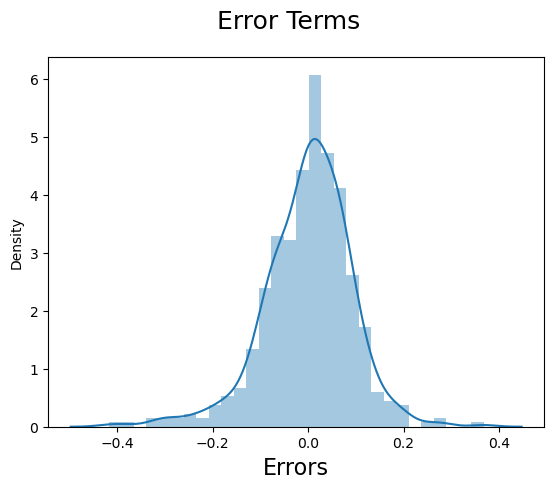

In [49]:
y_train_pred= lr1_model.predict(X_train_sm)
res= y_train-y_train_pred
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 18)                  # Plot heading 
plt.xlabel('Errors', fontsize = 16)
plt.show()
 

#### Prediction and Evaluation of Test set

In [50]:
num_vars=['atemp','windspeed','hum','cnt']
df_Test[num_vars]=scaler.transform(df_Test[num_vars])
df_Test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
184,0,1,0,0.769660,1.955914,0.056255,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,1.808848,0.078579,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,2.517430,0.136540,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,1.270063,0.138263,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.887696,0.201802,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [51]:
#Deviding X and Y Test
y_test = df_Test.pop('cnt')
X_test = df_Test

In [52]:
#Droppin the columns from test data set which got dropped in train
X_test_new=X_test[X_train_rfe1.columns]
X_test_sm=sm.add_constant(X_test_new)

In [53]:
X_test_sm

,const,yr,holiday,atemp,windspeed,season_Spring,season_Winter,mnth_July,mnth_September,weathersit_Light Precipitation,weathersit_Mist + Cloudy
184,1.0,0,1,0.769660,0.056255,0,0,1,0,0,1
535,1.0,1,0,0.842587,0.078579,0,0,0,0,0,0
299,1.0,0,0,0.496145,0.136540,0,1,0,0,0,1
221,1.0,0,0,0.795343,0.138263,0,0,0,0,0,0
152,1.0,0,0,0.741471,0.201802,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.243430,0.121512,1,0,0,0,0,1
702,1.0,1,0,0.511907,0.120223,0,1,0,0,0,0
127,1.0,0,0,0.577380,0.051532,0,0,0,0,0,0
640,1.0,1,0,0.682653,0.045945,0,1,0,0,0,1


In [54]:
y_test_pred=lr1_model.predict(X_test_sm)
y_test_pred

184    0.359788
535    0.870728
299    0.424777
221    0.606188
152    0.573198
         ...   
400    0.388082
702    0.750956
127    0.515904
640    0.757848
72     0.279182
Length: 219, dtype: float64

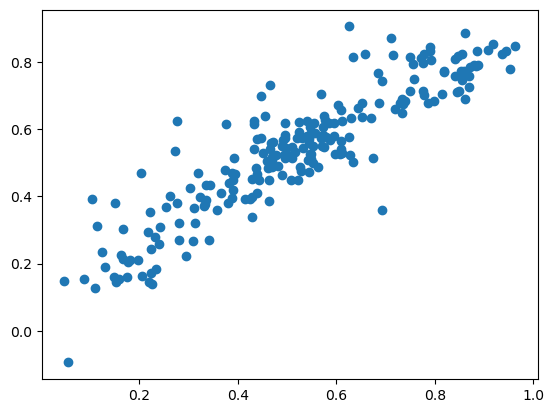

In [55]:
# Plotting ytest and ytest_pred.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
plt.show()

In [56]:
# lets calsulate Rsquare
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8063047432586247